<a href="https://colab.research.google.com/github/mdparvex/Alzheimer-s-Desease-classification/blob/main/AlzResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = get_data('/content/drive/MyDrive/Colab Notebook/train_test_val/train')
val = get_data('/content/drive/MyDrive/Colab Notebook/train_test_val/val')
test = get_data('/content/drive/MyDrive/Colab Notebook/train_test_val/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

x_test=[]
y_test=[]

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test)/255


x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
x_train.shape

(5119, 128, 128, 3)

In [ ]:
x_test.shape

(642, 128, 128, 3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
base_model = ResNet50(input_shape=(128,128,3), 
                   include_top=False,
                   weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [ ]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 200,batch_size=64 , validation_data = (x_val, y_val))

Epoch 1/200
80/80 [==============================] - 14s 97ms/step - loss: 1.5963 - accuracy: 0.2745 - val_loss: 1.3585 - val_accuracy: 0.2739
Epoch 2/200
80/80 [==============================] - 6s 76ms/step - loss: 1.5172 - accuracy: 0.3010 - val_loss: 1.2945 - val_accuracy: 0.4992
Epoch 3/200
80/80 [==============================] - 6s 76ms/step - loss: 1.4666 - accuracy: 0.3247 - val_loss: 1.2499 - val_accuracy: 0.4992
Epoch 4/200
80/80 [==============================] - 6s 76ms/step - loss: 1.4319 - accuracy: 0.3507 - val_loss: 1.2020 - val_accuracy: 0.5258
Epoch 5/200
80/80 [==============================] - 6s 76ms/step - loss: 1.4023 - accuracy: 0.3667 - val_loss: 1.1813 - val_accuracy: 0.5243
Epoch 6/200
80/80 [==============================] - 6s 77ms/step - loss: 1.3959 - accuracy: 0.3635 - val_loss: 1.1216 - val_accuracy: 0.5493
Epoch 7/200
80/80 [==============================] - 6s 77ms/step - loss: 1.3642 - accuracy: 0.3858 - val_loss: 1.1367 - val_accuracy: 0.5227
Epoch

In [ ]:
scores = model.evaluate(x_test,y_test , verbose=1)

21/21 [==============================] - 2s 55ms/step - loss: 0.1746 - accuracy: 0.9408


In [ ]:
accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

Accuracy:  94.0809965133667
Loss:  0.17461642622947693


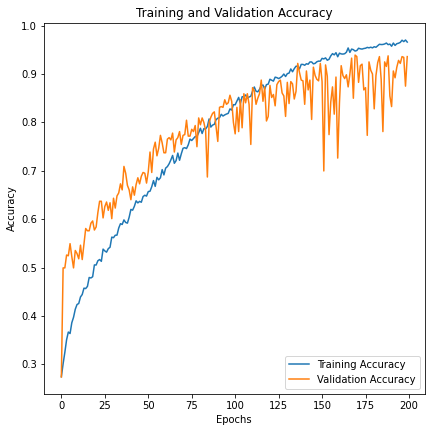

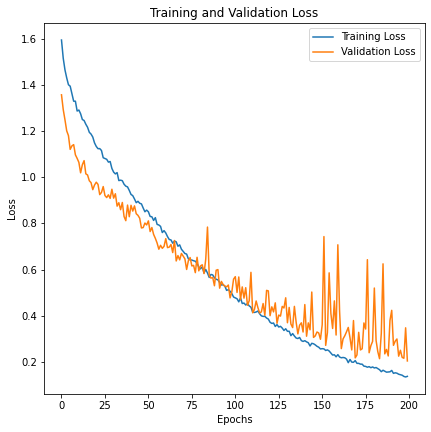

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.title('Training and Validation Accuracy')

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.show()